In [1]:
import cuseries as cs
import cupy as cp
import numpy as np
import pylab as pl

In [2]:
with cs.util.Timer("load data"):
    query, subject = cs.util.ECGLoader().data

elapsed time: 675 ms (load data)


In [3]:
num_repeats = 2 # just to eliminate initial jit compiler overhead on first call

elapsed time: 2272 ms (align sdist fft)
elapsed time: 671 ms (align sdist naive)
elapsed time: 77 ms (align sdist fft)
elapsed time: 103 ms (align sdist naive)


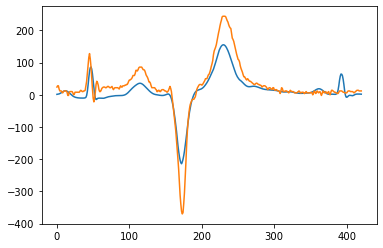

In [4]:
for _ in range(num_repeats):
    with cs.util.Timer("align sdist fft"):
        ying = cs.ED.sdist(query, subject, mode="fft")
    with cs.util.Timer("align sdist naive"):
        yang = cs.ED.sdist(query, subject, mode="naive")
assert(cp.allclose(ying, yang))

k = int(cp.argmin(yang))
pl.plot(query)
pl.plot(subject[k:k+len(query)])

elapsed time: 498 ms (align mdist fft)
elapsed time: 383 ms (align mdist naive)
elapsed time: 81 ms (align mdist fft)
elapsed time: 150 ms (align mdist naive)


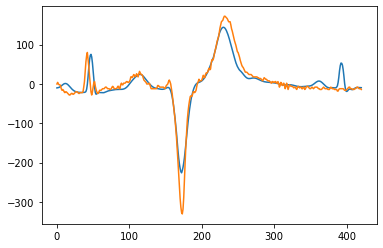

In [5]:
for _ in range(num_repeats):
    with cs.util.Timer("align mdist fft"):
        ying = cs.ED.mdist(query, subject, mode="fft")
    with cs.util.Timer("align mdist naive"):
        yang = cs.ED.mdist(query, subject, mode="naive")
assert(cp.allclose(ying, yang))

k = int(cp.argmin(yang))
mnorm = lambda x : x-np.mean(x)
pl.plot(mnorm(query))
pl.plot(mnorm(subject[k:k+len(query)]))

elapsed time: 1987 ms (align zdist fft)
elapsed time: 432 ms (align zdist naive)
elapsed time: 83 ms (align zdist fft)
elapsed time: 150 ms (align zdist naive)


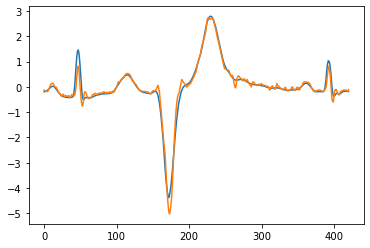

In [6]:
for _ in range(num_repeats):
    with cs.util.Timer("align zdist fft"):
        ying = cs.ED.zdist(query, subject, mode="fft")
    with cs.util.Timer("align zdist naive"):
        yang = cs.ED.zdist(query, subject, mode="naive")

assert(cp.allclose(ying, yang))
        
k = int(cp.argmin(yang))
znorm = lambda x : (x-np.mean(x))/np.std(x, ddof=0)
pl.plot(znorm(query))
pl.plot(znorm(subject[k:k+len(query)]))

In [7]:
dir(cs)

['ECGLoader',
 'ED',
 'Loader',
 'Timer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'mdist',
 'sdist',
 'util',
 'zdist']

In [8]:
query.shape, subject.shape

((421,), (20140000,))

In [9]:
import tqdm

subject = subject[:100000]

width=len(subject)-len(query)+1
dists = cp.zeros(width)

S = cp.asarray(subject)

for k in tqdm.tqdm(range(width)):
    Q = cp.asarray(subject[k:k+len(query)])
    R = cs.ED.zdist(Q, S, mode="naive")
    R[k:k+len(query)] = float("infinity")
    dists[k] = cp.min(R)



100%|██████████| 99580/99580 [02:42<00:00, 612.14it/s]


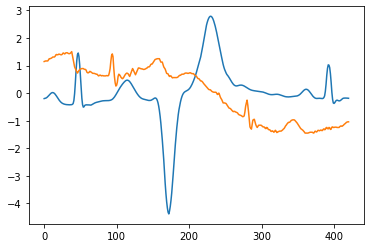

In [10]:
k = int(cp.argmin(dists))
znorm = lambda x : (x-np.mean(x))/np.std(x, ddof=0)
pl.plot(znorm(query))
pl.plot(znorm(subject[k:k+len(query)]))

In [11]:
k = cp.argmin(dists)